# Clock model example

In this example, we are studying the superconducting qubit model for a quantum clock. The only issue I can see is the fact that we look at the FHT of the angle and not the direct measurement output. 

In [3]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
from _funcs import *

import seaborn as sns
plt.rc('text', usetex=True)
sns.set()

def get_first_hit(array, x):
    # create a function that returs first hitting time of array >= x
    try: 
        return np.min(np.where(array>=x))
    except ValueError:
        return None

In [4]:
# Parameters
Gamma = 3
Omega = 0.5
dt = 0.01
tf = 50
t = np.arange(0, tf, dt)

# Define system operators
sp = sigmap()
sm = sigmam()
sx = sigmax()
sz = sigmaz()
H = Omega*sx

# define dissipator and Hamiltonian
c_ops = [np.sqrt(Gamma) * sz]    

# steadystate
rho0 = fock(2, 1)

In [5]:
result = ssesolve(H, rho0, t, sc_ops=c_ops, e_ops=[sz], store_measurement=True)

Total run time:   0.05s


In [6]:
# get measurement results
meas = np.real(result.measurement[0].T)[0]+ Gamma-.6
meas_int = dt*np.cumsum(meas)
ez = np.real(result.expect[0])
ez_int = dt*np.cumsum(ez)

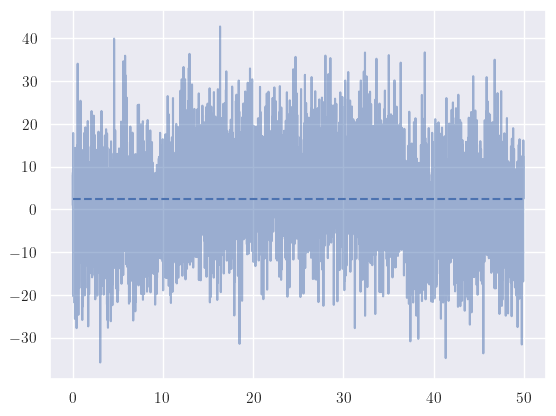

In [7]:
plt.plot(t, meas, alpha=0.5, label='measurement')
plt.hlines(np.mean(meas), 0, tf, linestyles='dashed')
plt.show()

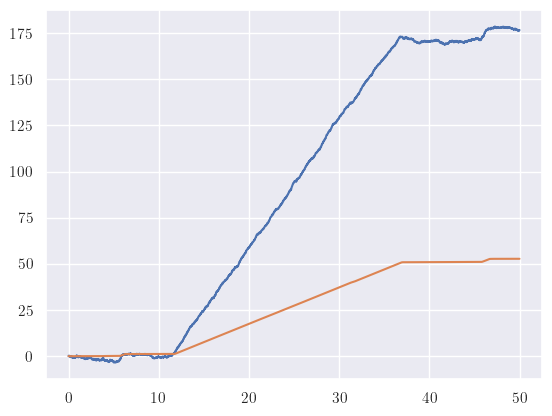

In [8]:
plt.plot(t, dt*np.cumsum(meas + 1))
plt.plot(t, dt*np.cumsum(ez+1))

# plt.ylim(0, 3)

plt.show()

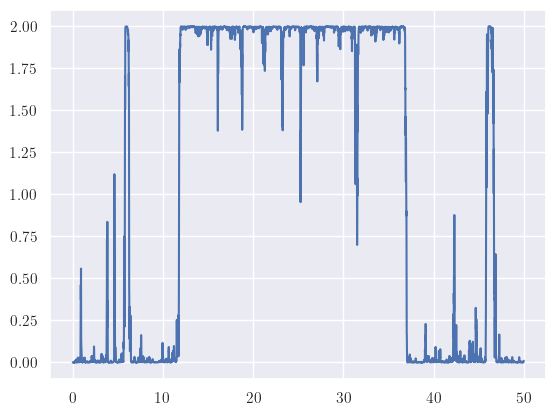

In [9]:
plt.plot(t, ez+1)
# plt.plot(t, -dt*np.cumsum(ez+1))

plt.show()

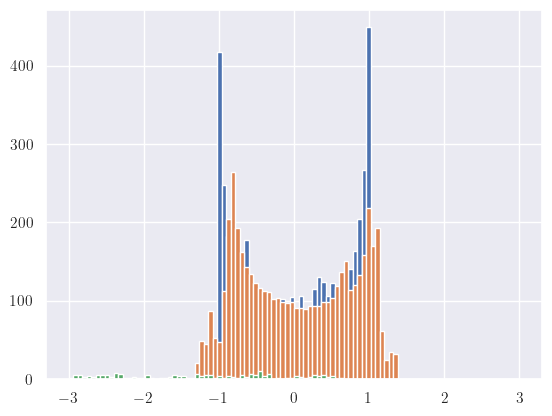

In [201]:
plt.hist(ez, bins=100, range=[-3,3])
plt.hist(ez_int, bins=100, range=[-3,3])
plt.hist(meas_int, bins=100, range=[-3,3])

plt.show()